Necessary Libraries

In [1]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import pandas as pd
from imblearn.over_sampling import SMOTE

uploading the clean dataset

In [2]:
df = pd.read_csv("../data/clean_telco_2.csv")

In [3]:
X = df.drop(["Churn", "customerID"], axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Models

In [4]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, n_estimators=100, max_depth=5)

}

In [5]:
for name, model in models.items():
    with mlflow.start_run(run_name=name):
        model.fit(X_resampled, y_resampled)
        preds = model.predict(X_test)
        proba = model.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, proba)

        mlflow.log_param("model_name", name)
        mlflow.log_metric("roc_auc", auc)
        mlflow.sklearn.log_model(model, "model")

        print(f"\n{name} - ROC AUC: {auc:.4f}")
        print(classification_report(y_test, preds))

2025/05/05 22:04:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Logistic Regression - ROC AUC: 0.8553
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1036
           1       0.58      0.75      0.66       373

    accuracy                           0.79      1409
   macro avg       0.74      0.78      0.75      1409
weighted avg       0.82      0.79      0.80      1409



2025/05/05 22:05:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Random Forest - ROC AUC: 0.8571
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1036
           1       0.57      0.79      0.66       373

    accuracy                           0.78      1409
   macro avg       0.74      0.79      0.75      1409
weighted avg       0.82      0.78      0.79      1409



c:\Users\beyza\anaconda3\envs\mlops25\lib\site-packages\xgboost\training.py:183: UserWarning: [22:05:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
2025/05/05 22:05:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



XGBoost - ROC AUC: 0.8352
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1036
           1       0.58      0.64      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



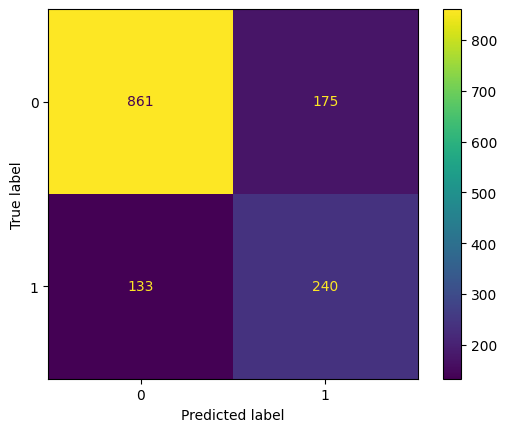

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Save plot
plt.savefig("confusion_matrix.png")
mlflow.log_artifact("confusion_matrix.png")
